In [4]:
import pandas as pd
data=pd.read_csv('data-breastcancer.csv')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [5]:
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 
                'Uniformity of Cell Shape', 'Marginal Adhesion', 
                'Single Epithelial Cell Size', 'Bare Nuclei', 
                'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


In [6]:
print(data.columns)

Index(['Sample code', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [8]:
print(data.describe())

        Sample code  Clump Thickness  Uniformity of Cell Size  \
count  6.980000e+02       698.000000               698.000000   
mean   1.071807e+06         4.416905                 3.137536   
std    6.175323e+05         2.817673                 3.052575   
min    6.163400e+04         1.000000                 1.000000   
25%    8.702582e+05         2.000000                 1.000000   
50%    1.171710e+06         4.000000                 1.000000   
75%    1.238354e+06         6.000000                 5.000000   
max    1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                698.000000         698.000000   
mean                   3.210602           2.809456   
std                    2.972867           2.856606   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000           1.000000   
75%                    5.000000     

In [18]:
data.shape#nbr of rows and columns

(698, 11)

In [23]:
data.isna().sum()

Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [20]:
import numpy as np
data=data.replace('?',np.NaN)
print('Number of instances = %d '% (data.shape[0]))
print('Number of attributes = %d '% (data.shape[1]))

print('Number of missing values :')
for col in data.columns:
    print('\t %s : %d' % (col,data[col].isna().sum()))


Number of instances = 698 
Number of attributes = 11 
Number of missing values :
	 Sample code : 0
	 Clump Thickness : 0
	 Uniformity of Cell Size : 0
	 Uniformity of Cell Shape : 0
	 Marginal Adhesion : 0
	 Single Epithelial Cell Size : 0
	 Bare Nuclei : 16
	 Bland Chromatin : 0
	 Normal Nucleoli : 0
	 Mitoses : 0
	 Class : 0


In [29]:
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'], errors='coerce')

data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())


In [30]:
data['Bare Nuclei']

0      10.0
1       2.0
2       4.0
3       1.0
4      10.0
       ... 
693     2.0
694     1.0
695     3.0
696     4.0
697     5.0
Name: Bare Nuclei, Length: 698, dtype: float64

In [32]:
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].mean())


In [33]:
data['Bare Nuclei'] 

0      10.0
1       2.0
2       4.0
3       1.0
4      10.0
       ... 
693     2.0
694     1.0
695     3.0
696     4.0
697     5.0
Name: Bare Nuclei, Length: 698, dtype: float64

In [36]:
data=data.drop(columns=['Sample code'])

In [38]:
data.shape

(698, 10)

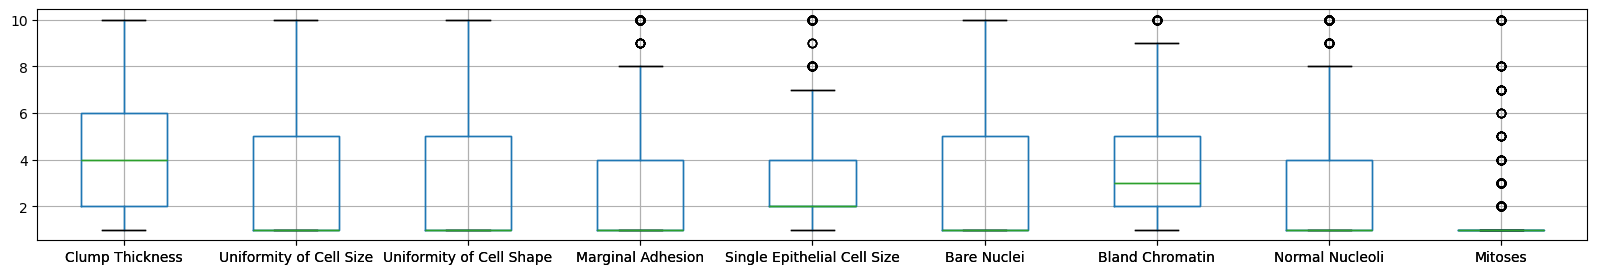

In [46]:
import matplotlib.pyplot as plt
data2 = data.drop(['Class'], axis=1) 

data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'], errors='coerce')

data2.boxplot(figsize=(20, 3))

plt.show()

In [49]:
Z = (data2 - data2.mean()) / data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,1.981456,0.610129,0.601910,0.066703,1.255857,0.968738,1.459640,2.333998,-0.343941
21,-0.502864,-0.700240,-0.743593,-0.633428,-0.549680,-0.687211,-0.589493,-0.611989,-0.343941
22,1.271650,0.282537,0.601910,-0.633428,-0.549680,-0.687211,1.459640,0.042675,-0.343941
23,-1.212669,-0.700240,-0.743593,-0.633428,-0.549680,-0.687211,-0.179666,-0.611989,-0.343941
24,0.206942,-0.372648,-0.070841,0.416769,-0.549680,0.968738,-0.179666,1.024670,-0.343941


In [52]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z > -3).sum(axis=1) == Z.shape[1]) & ((Z <= 3).sum(axis=1) == Z.shape[1]), :]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))


Number of rows before discarding outliers = 698
Number of rows after discarding outliers = 647


In [53]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]


Number of duplicate rows = 241


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,5,3,3,3,2,3.0,4,4,1,4
28,1,1,3,1,2,1.0,1,1,1,2


In [56]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))  
data2 = data.drop_duplicates()  
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))  # Correction de la chaîne ici


Number of rows before discarding duplicates = 698
Number of rows after discarding duplicates = 457


In [57]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
diabetes = load_diabetes()
column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data)
df_diabetics.columns = column_name
print(df_diabetics.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


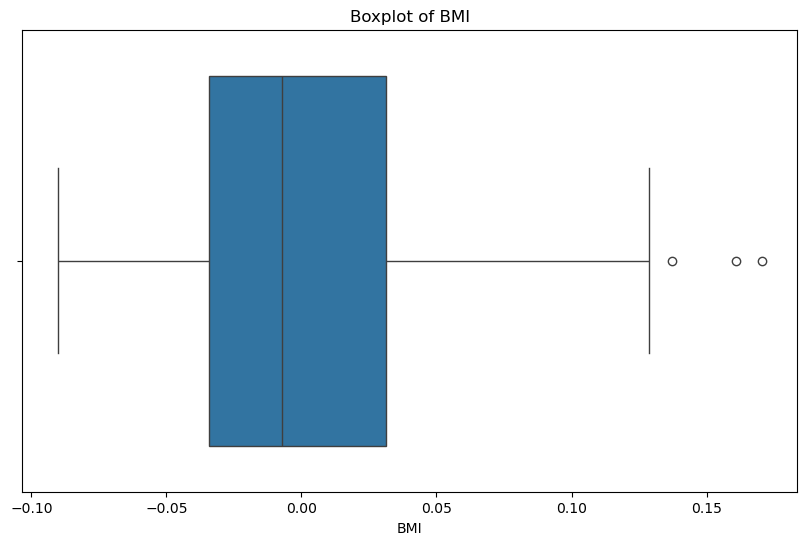

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_diabetics['bmi'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

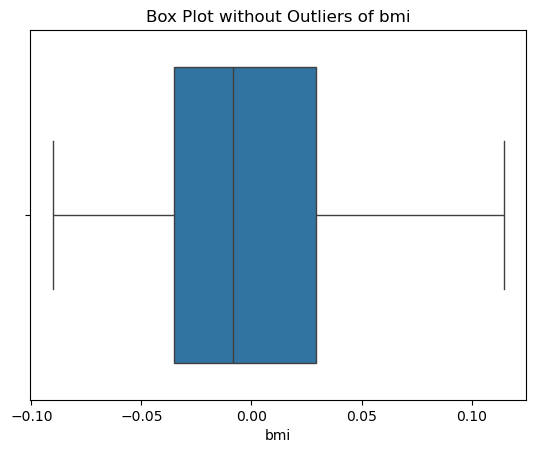

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    
    sns.boxplot(x=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers
    
threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)


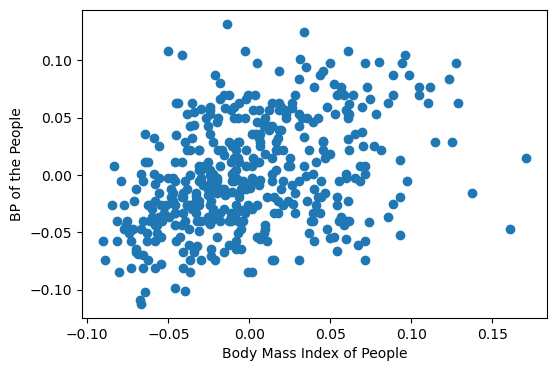

In [61]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])

ax.set_xlabel('Body Mass Index of People')
ax.set_ylabel('BP of the People')
plt.show()


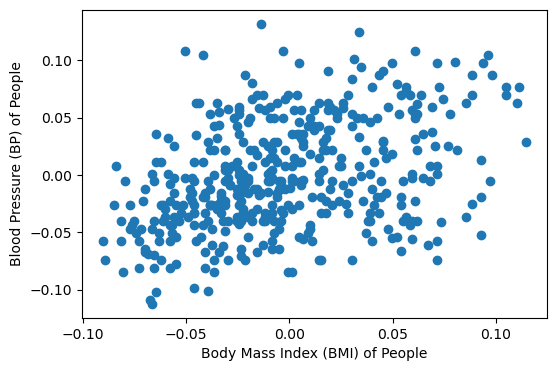

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('Body Mass Index (BMI) of People')
ax_no_outliers.set_ylabel('Blood Pressure (BP) of People')
plt.show()
